In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [3]:
num_classes = 20
image_dimension = 32
batch_size = 64

In [4]:
TRAIN_DIR = os.getcwd() + '\\simpsons\\train'
VALIDATION_DIR =os.getcwd() + '\\simpsons\\validation'

In [5]:
TRAIN_DIR, VALIDATION_DIR

('C:\\StudyFast\\EpicDL\\simpsons\\train',
 'C:\\StudyFast\\EpicDL\\simpsons\\validation')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(image_dimension, image_dimension),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(image_dimension, image_dimension),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(
    image_dimension, image_dimension, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

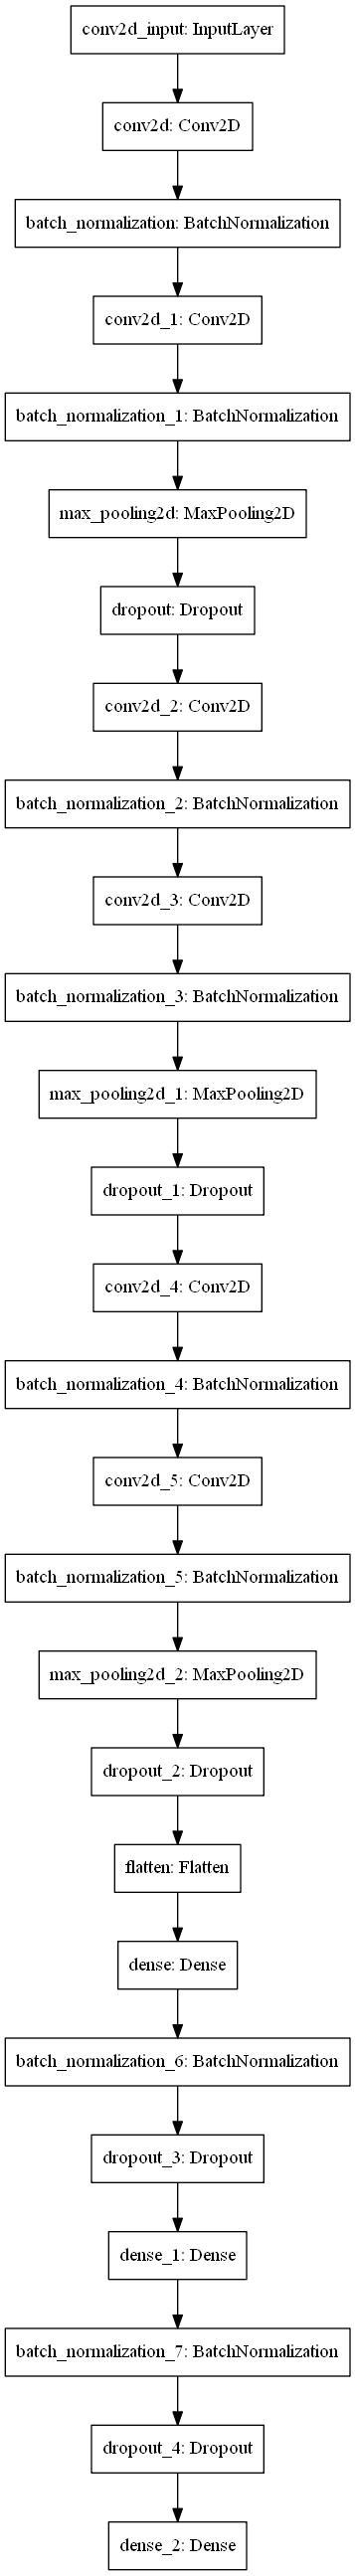

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [11]:
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 50

In [12]:
checkpoint = ModelCheckpoint(os.getcwd() + "\\Trained Models\\simpsons_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log_dir\\model', histogram_freq=1)

callbacks = [earlystop, checkpoint, tensorboard_callback]

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
304/305 [============================>.] - ETA: 0s - loss: 3.1573 - accuracy: 0.1700
Epoch 00001: val_loss improved from inf to 3.34103, saving model to C:\StudyFast\EpicDL\Trained Models\simpsons_cnn_1.h5
305/305 [==============================] - 49s 161ms/step - loss: 3.1561 - accuracy: 0.1703 - val_loss: 3.3410 - val_accuracy: 0.0365
Epoch 2/50
304/305 [============================>.] - ETA: 0s - loss: 2.0146 - accuracy: 0.4008
Epoch 00002: val_loss improved from 3.34103 to 2.02832, saving model to C:\StudyFast\EpicDL\Trained Models\simpsons_cnn_1.h5
305/305 [==============================] - 43s 142ms/step - loss: 2.0143 - accuracy: 0.4006 - val_loss: 2.0283 - val_accuracy: 0.3958
Epoch 3/50
304/305 [============================>.] - ETA: 0s - loss: 1.4449 - accuracy: 0.5622
Epoch 00003: val_loss improved from 2.02832 to 1.32070, saving model to C:\StudyFast\EpicDL\Trained Models\simpsons_cnn_1.h5
305/305 [==============================] - 44s 143ms/step - loss: 1.4452 

Epoch 25/50
304/305 [============================>.] - ETA: 0s - loss: 0.3833 - accuracy: 0.8927
Epoch 00025: val_loss did not improve from 0.17738
305/305 [==============================] - 43s 141ms/step - loss: 0.3827 - accuracy: 0.8928 - val_loss: 0.2852 - val_accuracy: 0.9125
Epoch 26/50
304/305 [============================>.] - ETA: 0s - loss: 0.3870 - accuracy: 0.8932
Epoch 00026: val_loss did not improve from 0.17738
305/305 [==============================] - 43s 141ms/step - loss: 0.3869 - accuracy: 0.8932 - val_loss: 0.2568 - val_accuracy: 0.9323
Epoch 27/50
304/305 [============================>.] - ETA: 0s - loss: 0.3586 - accuracy: 0.9000
Epoch 00027: val_loss did not improve from 0.17738
305/305 [==============================] - 43s 141ms/step - loss: 0.3585 - accuracy: 0.9002 - val_loss: 0.1844 - val_accuracy: 0.9490
Epoch 28/50
304/305 [============================>.] - ETA: 0s - loss: 0.3490 - accuracy: 0.9048
Epoch 00028: val_loss did not improve from 0.17738
305/30

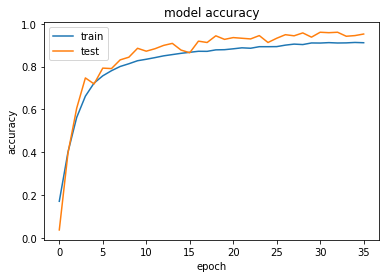

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

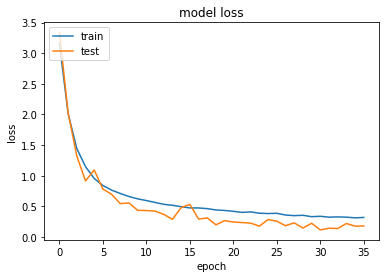

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from tensorflow.keras.models import load_model
loaded_model = load_model(os.getcwd() + "\\Trained Models\\simpsons_cnn_1.h5")

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Confution Matrix and Classification Report
Y_pred = loaded_model.predict_generator(
    validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

class_labels = {v: k for k, v in validation_generator.class_indices.items()}

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes,
                            y_pred, target_names=target_names))

Confusion Matrix
[[48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 47  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  2  1  1  0 43  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 47  1  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  2  0  0 46  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 46  0  0  0  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0 47  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0 47  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 

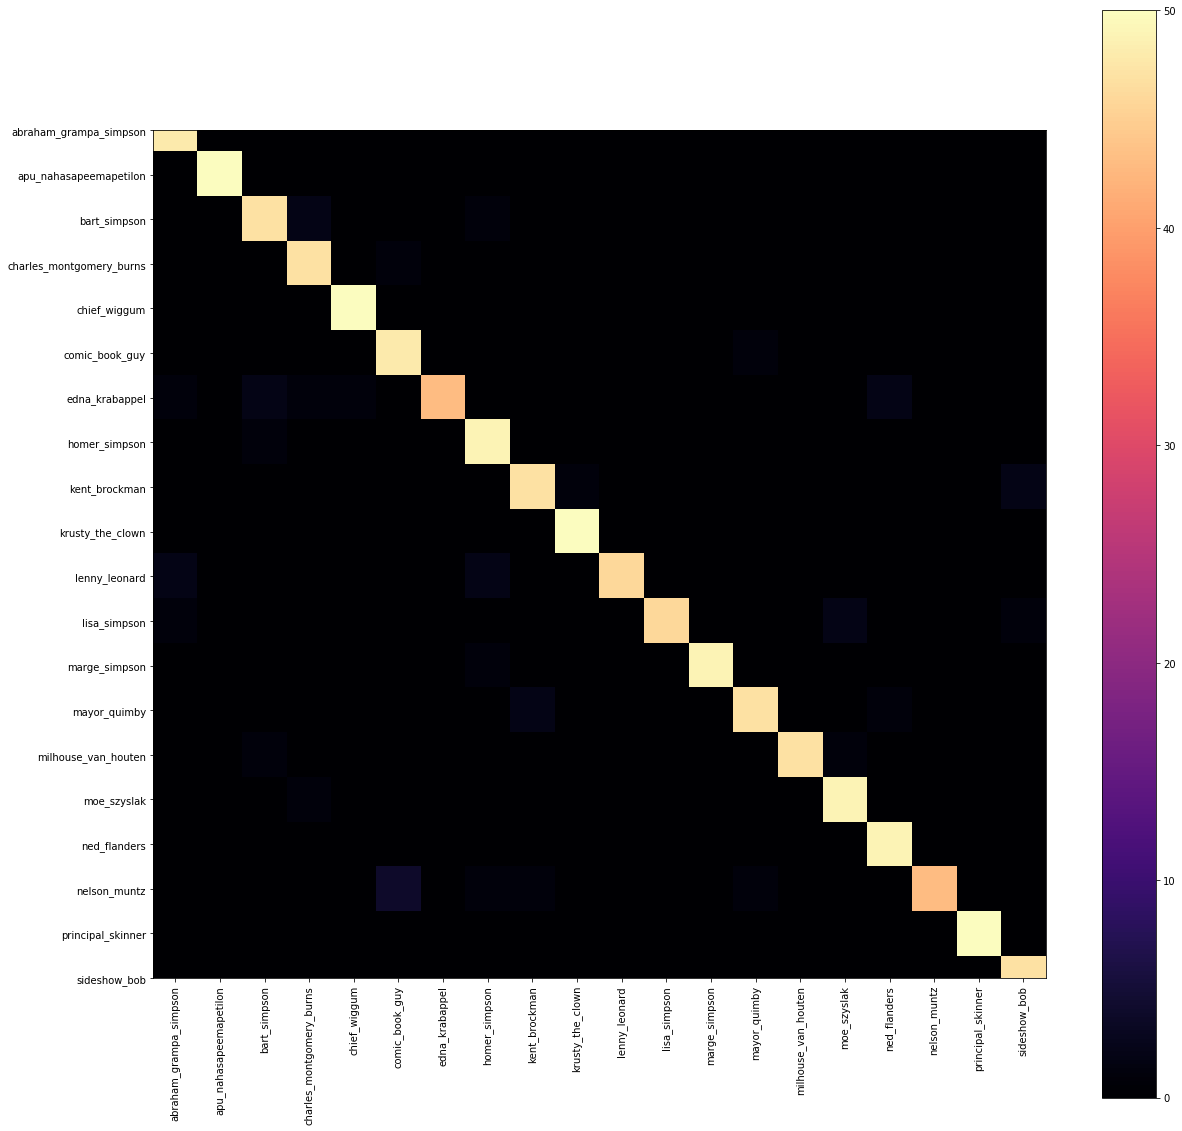

In [17]:
plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
plt.imshow(cnf_matrix, interpolation='nearest', cmap = "magma")
plt.colorbar()

classes = list(class_labels.values())

tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [18]:
from os import listdir
from tensorflow.keras.preprocessing import image

path = VALIDATION_DIR

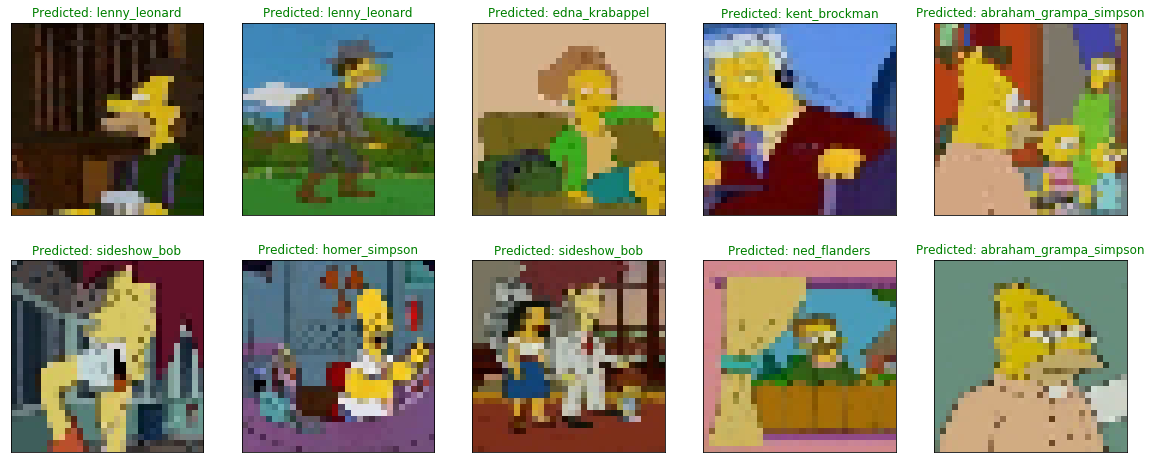

In [19]:
fig = plt.figure(figsize=(20,8))

def predictedLabelColor(original, predicted):
    if original == predicted:
        return 'green'
    else:
        return 'red'

for i in range(10):
    simpson_char_names = os.listdir(path)
    simpson_char_names_folders = os.listdir(path)
    random_simpson_char_index = np.random.randint(0,len(simpson_char_names))
    simpson_char_name = simpson_char_names_folders[random_simpson_char_index]

    simpson_char_images_path = path + '\\' + simpson_char_name
    simpson_char_images = os.listdir(simpson_char_images_path)
    random_simpson_char_image_index = np.random.randint(0,len(simpson_char_images))
    simpson_char_image = simpson_char_images[random_simpson_char_image_index]
    simpson_char_image_path = simpson_char_images_path + '\\' + simpson_char_image
    
    result_image_array = image.img_to_array(image.load_img(simpson_char_image_path, target_size = (image_dimension, image_dimension)))
    normalized_result = result_image_array * 1./255
    expanded_result = np.expand_dims(normalized_result, axis=0)
    classes = loaded_model.predict_classes(expanded_result, batch_size = 10)
    predicted_label = class_labels[classes[0]]
    
    #plt.imshow(image.load_img(simpson_char_image_path, target_size = (image_dimension, image_dimension)))
    #plt.xlabel('Original: {}, Predicted: {}'.format(simpson_char_name, predicted_label))
    
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title('Predicted: {}'.format(predicted_label), color=predictedLabelColor(simpson_char_name, predicted_label))
    plt.imshow(normalized_result)

plt.show()